In [ ]:
import pandas as pd 
import numpy as np
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import sklearn
 
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
 
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
 
import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()
 
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sheet1 = pd.read_csv( 'datasets_897_1638_Sheet_1.csv',encoding='latin-1' )

Sheet_1.csv contains 80 user responses, in the response_text column, to a therapy chatbot.

In [ ]:
sheet1.head(5)

,response_id,class,response_text,addicted,age,gender,state
0,response_1,not_flagged,I try and avoid this sort of conflict,No,24,M,Yorkshire
1,response_2,flagged,Had a friend open up to me about his mental ad...,No,31,M,Scotland
2,response_3,flagged,I saved a girl from suicide once. She was goin...,Yes,34,F,Scotland
3,response_4,not_flagged,i cant think of one really...i think i may hav...,Yes,35,M,Wales
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,Yes,37,F,Yorkshire


DATASET DESCRIPTION: Dataset is from theropy seasons it consist of 7 columns

In [ ]:
sheet1.isnull().sum()

response_id      0
class            0
response_text    0
addicted         0
age              0
gender           0
state            0
dtype: int64

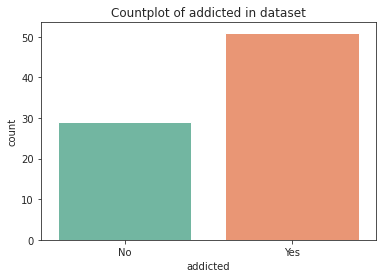

In [ ]:
plt.title("Countplot of addicted in dataset")
ax = sns.countplot(x="addicted", data=sheet1, palette="Set2")

In [ ]:
sheet1['addicted'].value_counts()

Yes    51
No     29
Name: addicted, dtype: int64

In [ ]:
addc_mode=sheet1['addicted'].mode()
print('Mode in addicted: ',addc_mode)

Mode in addicted:  0    Yes
dtype: object


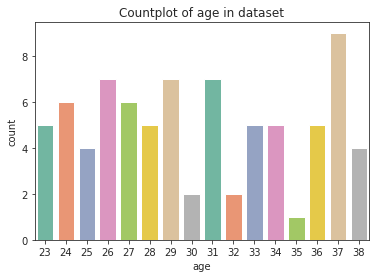

In [ ]:
plt.title("Countplot of age in dataset")
ax= sns.countplot(x='age',data=sheet1,palette='Set2')

In [ ]:
sheet1['age'].value_counts()

37    9
31    7
29    7
26    7
27    6
24    6
36    5
34    5
33    5
28    5
23    5
38    4
25    4
32    2
30    2
35    1
Name: age, dtype: int64

In [ ]:
a=sheet1['age'].min()
b=sheet1['age'].max()
print('Age group in the dataset is between  {0} - {1} ' .format(a,b))

Age group in the dataset is between  23 - 38 


In [ ]:
age_mean=sheet1['age'].mean()
print('Mean age :',age_mean)
ag_mode=sheet1['age'].mode()
print('Mode in age:',ag_mode)

Mean age : 30.275
Mode in age: 0    37
dtype: int64


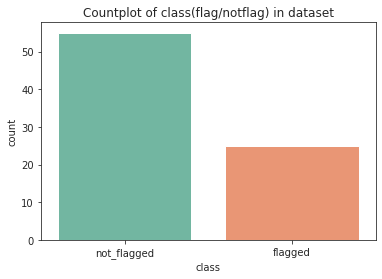

In [ ]:
plt.title("Countplot of class(flag/notflag) in dataset")
ax = sns.countplot(x="class", data=sheet1, palette="Set2")

In [ ]:
sheet1['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

Chat bot is given dataset with 25 flagged and 55 not flagged responces

In [ ]:
class_mode=sheet1['class'].mode()
print('Mode in class: ',class_mode)

Mode in class:  0    not_flagged
dtype: object


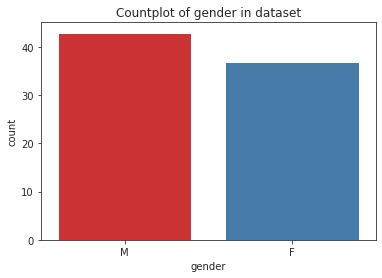

In [ ]:
plt.title("Countplot of gender in dataset")
ax = sns.countplot(x='gender',data=sheet1,palette='Set1')

In [ ]:
sheet1['gender'].value_counts()

M    43
F    37
Name: gender, dtype: int64

In [ ]:
gs_mode=sheet1['gender'].mode()
print('Mode in gender : ',gs_mode)

Mode in gender :  0    M
dtype: object


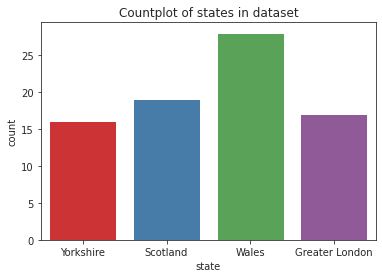

In [ ]:
plt.title("Countplot of states in dataset")
ax = sns.countplot('state',data=sheet1,palette='Set1')

In [ ]:
sheet1['state'].value_counts()

Wales             28
Scotland          19
Greater London    17
Yorkshire         16
Name: state, dtype: int64

In [ ]:
sts_mode=sheet1['state'].mode()
print('Mode in state: ',sts_mode)

Mode in state:  0    Wales
dtype: object


In [ ]:
def cloud(text):
    wordcloud = WordCloud(background_color="white",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")


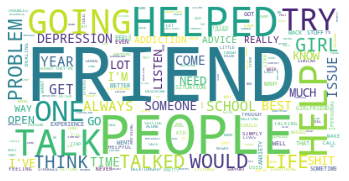

In [ ]:
cloud(sheet1['response_text'])

Wordcloud is used to visualize frequency of the words occurance in dataframe
Friend, People, Help, Helped, Problem, School etc,. are most frequently used words in the dataset

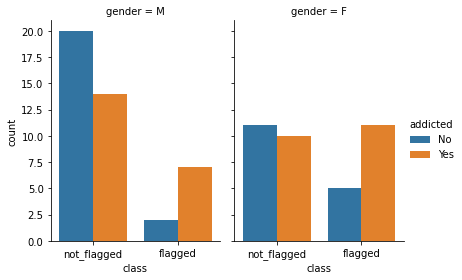

In [ ]:
ax=sns.catplot(x="class", hue="addicted", col="gender",
                data=sheet1, kind="count",
                height=4, aspect=.7)

Catplot is a combination of countplot and Facetgrid                              
Countplot of class, addicted and gender

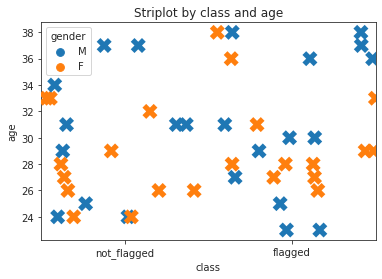

In [ ]:
plt.title("Striplot by class and age")
ax=sns.stripplot(x ='class',y='age',hue='gender', data = sheet1, jitter= 1.5,s=15,marker='X') 

Density of notflagged is more than flagged we can understand there are more notflagged than flagged

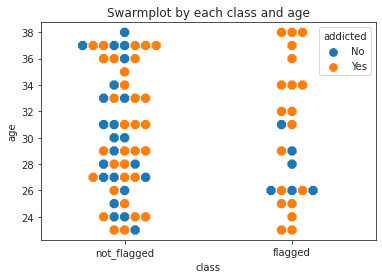

In [ ]:
plt.title("Swarmplot by each class and age")
sns.swarmplot(x='class',y='age',hue='addicted', data=sheet1,s=10,marker='8')
plt.show()

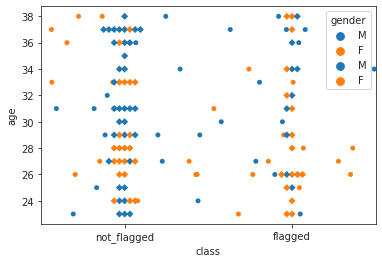

In [ ]:
sns.stripplot(x ='class',y='age',hue='gender', data = sheet1, jitter= 1.5,marker='o',s=5) 
sns.swarmplot(x='class',y='age',hue='gender', data=sheet1, marker='D',s=5,edgecolor='grey')
sns.axes_style('darkgrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

**Combination of both swarmplot ans stripplot to illustrate the distribution variables distribution**

In [ ]:
df_gby1 = sheet1.groupby(['state','gender'])

In [ ]:
df_gby1.first()

response_id        class  ... addicted age
state          gender                            ...             
Greater London F        response_6  not_flagged  ...       No  26
               M       response_13  not_flagged  ...      Yes  29
Scotland       F        response_3      flagged  ...      Yes  34
               M        response_2      flagged  ...       No  31
Wales          F        response_8      flagged  ...      Yes  25
               M        response_4  not_flagged  ...      Yes  35
Yorkshire      F        response_5  not_flagged  ...      Yes  37
               M        response_1  not_flagged  ...       No  24

[8 rows x 5 columns]

Grouping the dataframe using State(location), gender 

In [ ]:
df_gby1.get_group(('Wales','F'))

,response_id,class,response_text,addicted,age
7,response_8,flagged,i've had a couple of friends (you could say mo...,Yes,25
25,response_26,flagged,"Last year, my best friend was diagnosed with a...",Yes,38
26,response_27,flagged,Cleaning up my friend's campsite and slightly ...,No,26
29,response_30,not_flagged,I used to tutor homeless men at a shelter to h...,No,29
31,response_32,not_flagged,Friends often come to me to talk about the iss...,Yes,28
32,response_33,not_flagged,"Summer camp, countless kids have the same issu...",Yes,36
38,response_39,flagged,One of my best friends was diagnosed with canc...,No,26
42,response_43,not_flagged,"I'm the theripist of my friends, they always c...",Yes,27
45,response_46,not_flagged,Friend got dumped by girl he had been in a rel...,Yes,28
54,response_55,not_flagged,I care about other people more than myself so ...,No,27


Using get_group function to get group from Wales which has only Female 

In [ ]:
df_gby1.get_group(('Greater London','M'))

,response_id,class,response_text,addicted,age
12,response_13,not_flagged,Anxious girlfriend always needs my help,Yes,29
21,response_22,flagged,"Friend was thinking about suicide, after a few...",Yes,26
30,response_31,not_flagged,I am a high school teacher so almost everyday.,No,31
34,response_35,not_flagged,Don't have a specific example but just letting...,No,33
36,response_37,flagged,"Friend who had big addiction issues, ended up ...",Yes,34
37,response_38,not_flagged,I've always been a good listener for people an...,No,25
60,response_61,not_flagged,"People calling, talk some sense into them, may...",No,31
65,response_66,not_flagged,Helped friends through stuff.,Yes,23
70,response_71,not_flagged,never.,No,24
78,response_79,flagged,My now girlfriend used to have serious addicti...,Yes,25


using same getgroup function to get group of males from Greater London

In [ ]:
df_gby2=sheet1.groupby(['state','gender','addicted'])
df_gby2.first()

response_id  ... age
state          gender addicted               ...    
Greater London F      No         response_6  ...  26
                      Yes       response_10  ...  23
               M      No        response_31  ...  31
                      Yes       response_13  ...  29
Scotland       F      No        response_16  ...  26
                      Yes        response_3  ...  34
               M      No         response_2  ...  31
                      Yes       response_28  ...  29
Wales          F      No        response_27  ...  26
                      Yes        response_8  ...  25
               M      No        response_25  ...  37
                      Yes        response_4  ...  35
Yorkshire      F      No        response_12  ...  28
                      Yes        response_5  ...  37
               M      No         response_1  ...  24
                      Yes        response_7  ...  38

[16 rows x 4 columns]

Grouping addicted ones with respective to their state and gender

In [ ]:
df_gby2.get_group(('Scotland','M','Yes'))


,response_id,class,response_text,age
27,response_28,not_flagged,i listen pretty damn well. better at that as a...,29
28,response_29,flagged,Helping a friend through dealing with his alco...,32
46,response_47,not_flagged,I open myself to any friend in need of emotion...,23
48,response_49,flagged,I had a friend that would go off about girls a...,34
53,response_54,not_flagged,Talking to a friend over a break up.,31


These are men from Scotland who are substance addicted 




In [ ]:
df_gby3=sheet1.groupby(['state','gender','addicted','class'])
df_gby3.first()

response_id  ... age
state          gender addicted class                     ...    
Greater London F      No       flagged      response_62  ...  29
                               not_flagged   response_6  ...  26
                      Yes      flagged      response_10  ...  23
                               not_flagged  response_80  ...  24
               M      No       not_flagged  response_31  ...  31
                      Yes      flagged      response_22  ...  26
                               not_flagged  response_13  ...  29
Scotland       F      No       flagged      response_16  ...  26
                               not_flagged  response_24  ...  27
                      Yes      flagged       response_3  ...  34
                               not_flagged   response_9  ...  33
               M      No       flagged       response_2  ...  31
                               not_flagged  response_14  ...  30
                      Yes      flagged      response_29  ...  32
                               not_flagged  response_28  ...  29
Wales          F      No       flagged      response_27  ...  26
                               not_flagged  response_30  ...  29
                      Yes      flagged       response_8  ...  25
                               not_flagged  response_32  ...  28
               M      No       not_flagged  response_25  ...  37
                      Yes      flagged      response_23  ...  36
                               not_flagged   response_4  ...  35
Yorkshire      F      No       flagged      response_12  ...  28
                      Yes      flagged      response_41  ...  24
                               not_flagged   response_5  ...  37
               M      No       not_flagged   response_1  ...  24
                      Yes      flagged       response_7  ...  38
                               not_flagged  response_21  ...  37

[28 rows x 3 columns]

In [ ]:
df_gby3.get_group(('Yorkshire','F','Yes','flagged'))

,response_id,response_text,age
6,response_7,Roommate when he was going through death and l...,38
51,response_52,My friend was going through a period of intens...,29


Women from Yorkshire who are addicted to substances and need help

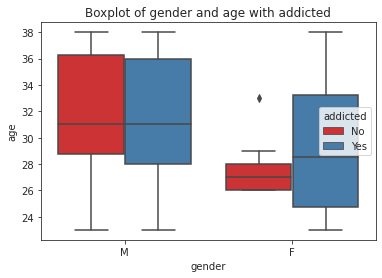

In [ ]:
 plt.title('Boxplot of gender and age with addicted')
 sns.boxplot(x="gender", y="age", hue="addicted",data=sheet1, palette="Set1")
 plt.show()

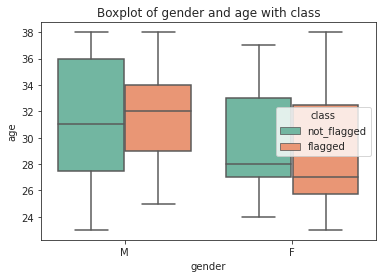

In [ ]:
 plt.title('Boxplot of gender and age with class')
 sns.boxplot(x="gender", y="age", hue="class",data=sheet1, palette="Set2")
 plt.show()

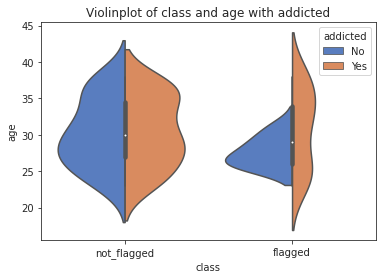

In [ ]:
plt.title('Violinplot of class and age with addicted')
sns.violinplot(x="class", y="age", hue="addicted", data=sheet1, palette="muted", split=True)
plt.show()

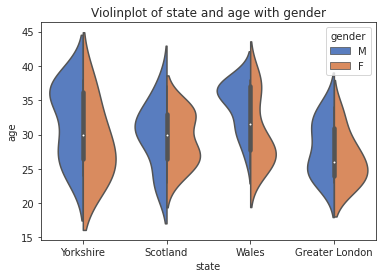

In [ ]:
plt.title('Violinplot of state and age with gender')
sns.violinplot(x="state", y="age", hue="gender", data=sheet1, palette="muted", split=True)
plt.show()

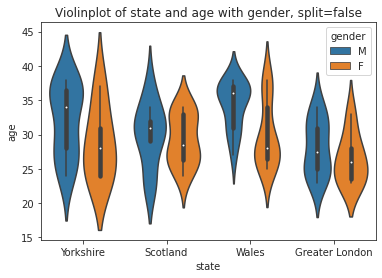

In [ ]:
plt.title('Violinplot of state and age with gender, split=false')
sns.violinplot(x="state", y="age", hue="gender", data=sheet1)
plt.show()

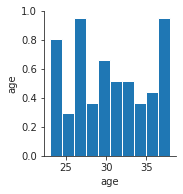

In [ ]:
sns.pairplot(sheet1)

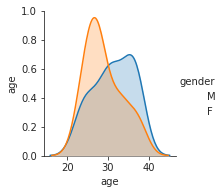

In [ ]:
sns.pairplot(sheet1,hue='gender',kind='kde')

#                              **THANK YOU**